In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [185]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

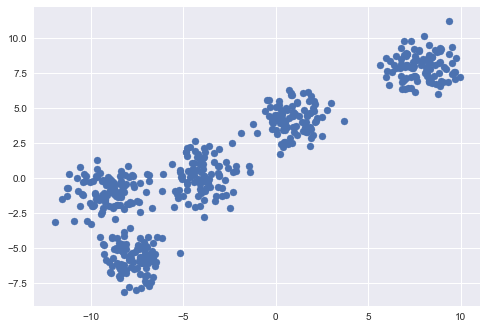

In [186]:
plt.style.use('seaborn')
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [187]:
X.shape

(500, 2)

In [216]:
k = 5

color = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random(X.shape[1])-1)
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
        }
    
    clusters[i] = cluster
    

In [217]:
print(clusters)

{0: {'center': array([ 4.84573536, -8.67248117]), 'points': [], 'color': 'green'}, 1: {'center': array([ 2.07182304, -3.68426922]), 'points': [], 'color': 'red'}, 2: {'center': array([4.6252296 , 2.08804718]), 'points': [], 'color': 'blue'}, 3: {'center': array([-7.88743659,  1.79462456]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 8.66767531, -4.15500701]), 'points': [], 'color': 'orange'}}


In [218]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [219]:
#v1 = np.array([1,2])
#v2 = np.array([3,5])
#distance(v1,v2)

In [220]:
# Assign every data point to one of the clusters
def assignpointToClusters(clusters): 
    for ix in range(X.shape[0]):  # E-step
        dist = []
        curr_x = X[ix]
    
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)

In [221]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        # Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
            #print(str(kx+1)+" cluster has no points")
        
        # Plot the clusters center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
        
    plt.show()

In [222]:
def updateClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        if pts.shape[0] > 0: # If a cluster has some-non zero points
            new_u = pts.mean(axis=0)
            #print("New", new_u)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] # Clear the list
            
            

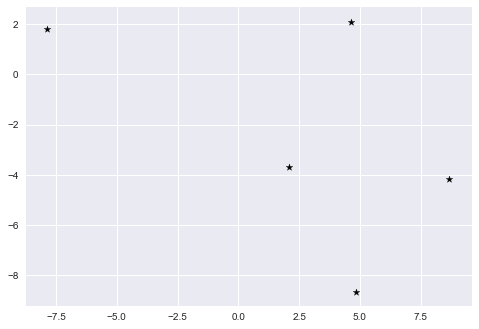

In [223]:
plotClusters(clusters)

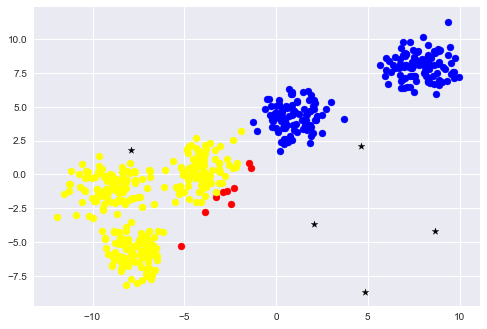

(0,)
(9, 2)
(199, 2)
(292, 2)
(0,)


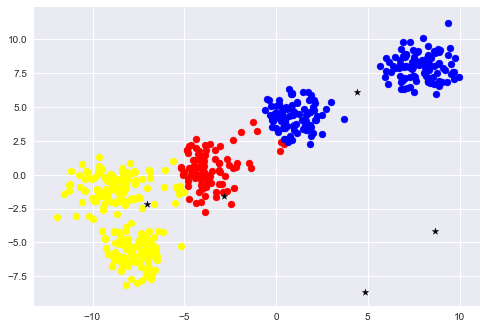

(0,)
(96, 2)
(193, 2)
(211, 2)
(0,)


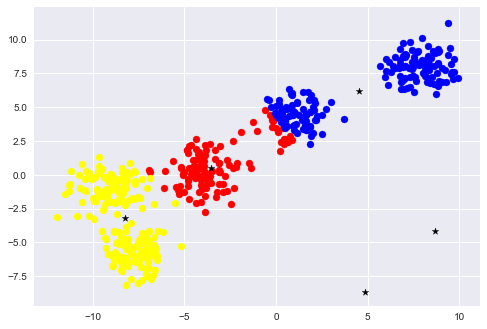

(0,)
(120, 2)
(179, 2)
(201, 2)
(0,)


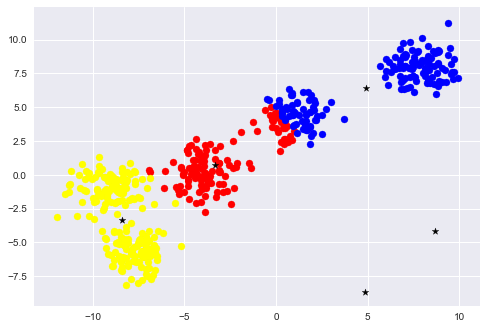

(0,)
(136, 2)
(163, 2)
(201, 2)
(0,)


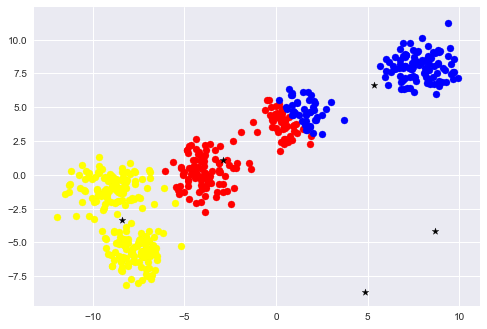

(0,)
(150, 2)
(146, 2)
(204, 2)
(0,)


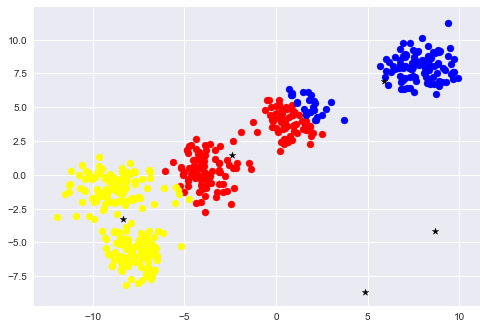

(0,)
(166, 2)
(126, 2)
(208, 2)
(0,)


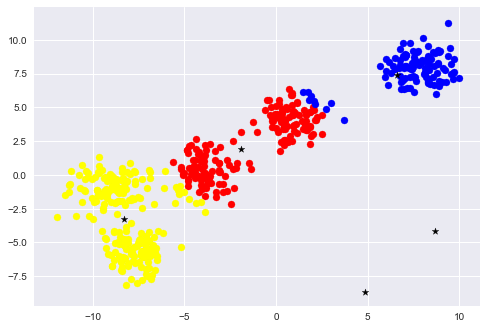

(0,)
(177, 2)
(109, 2)
(214, 2)
(0,)


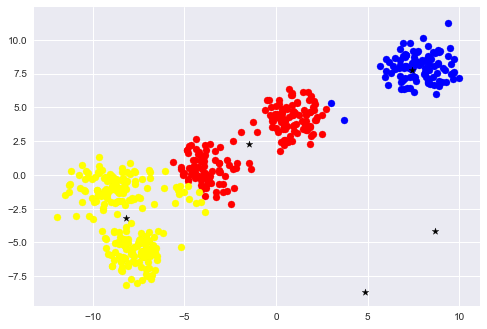

(0,)
(182, 2)
(102, 2)
(216, 2)
(0,)


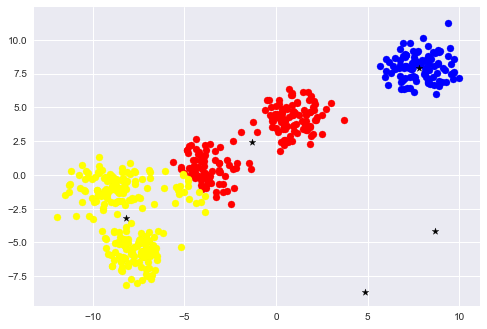

(0,)
(179, 2)
(100, 2)
(221, 2)
(0,)


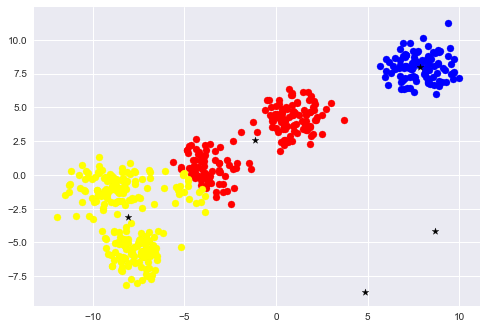

In [ ]:
for i in range(50):
    assignpointToClusters(clusters)
    plotClusters(clusters)
    updateClusters(clusters)